In [23]:
#imports
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.color import rgb2gray
from skimage.feature import hog
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
#Load the DataFrame
df = pd.read_csv("DataSet/labels.csv")
df.head()

,id,genus
0,520,1.0
1,3800,1.0
2,3289,1.0
3,2695,1.0
4,4922,1.0


In [11]:
#Define get image Function
def getImage(row_id, root = "DataSet/"):
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root,filename)
    img = Image.open(file_path)
    return np.array(img)

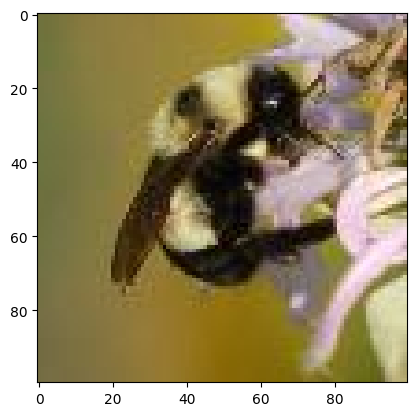

In [16]:
#Subset the dataframe and get one of the items for test
subdf = df[df["genus"] == 1.0]
bombus_row = subdf['id'][5]
plt.imshow(getImage(bombus_row))
plt.show()

(100, 100, 3)
(100, 100)


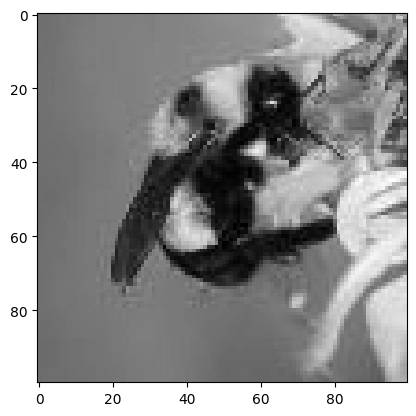

In [22]:
#Image Manipulation
bombus = getImage(bombus_row)
print(bombus.shape) #Have 3 channels of colors represented by the depth of the matrix
#Convert to grey scale
gray_bombus = rgb2gray(bombus)
# show the grayscale image
plt.imshow(gray_bombus, cmap=mpl.cm.gray)
#See the channels for the grey scale
print(gray_bombus.shape)


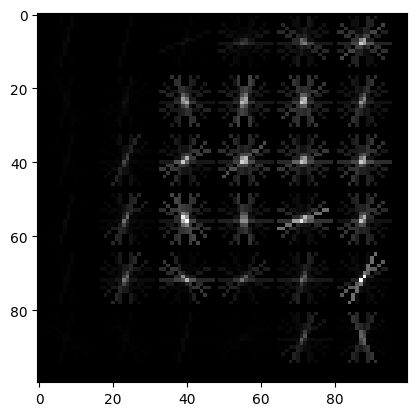

In [28]:
# run HOG using our grayscale bombus image
hog_features, hog_image = hog(gray_bombus,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

# show our hog_image with a gray colormap
plt.imshow(hog_image, cmap=mpl.cm.gray)

In [ ]:
#def create_feature